### Take grayscale image of size 512x512 and perform the following operations – 
### (b)  Differentiate the results of power law transform and inverse logarithmic transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread('./../../Images/Fractured_Spine_746x976.tif', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./../../Images/Aerial Image 765x769.tif', cv2.IMREAD_GRAYSCALE)

In [3]:
def power_law_transform(image, gamma):
    transformed_image = image.copy()
    height, weight = transformed_image.shape

    for row in range(height):
        for column in range(weight):
            pixel  = image[row, column]/255
            transformed_image[row, column] = (pixel ** gamma)*255
    return np.uint(transformed_image)

In [17]:
def inverse_logarithmic_transform(image):
    c = 255 / np.log(256)
    transformed_image = np.exp(image / c) - 1
    
    return np.uint8(transformed_image)

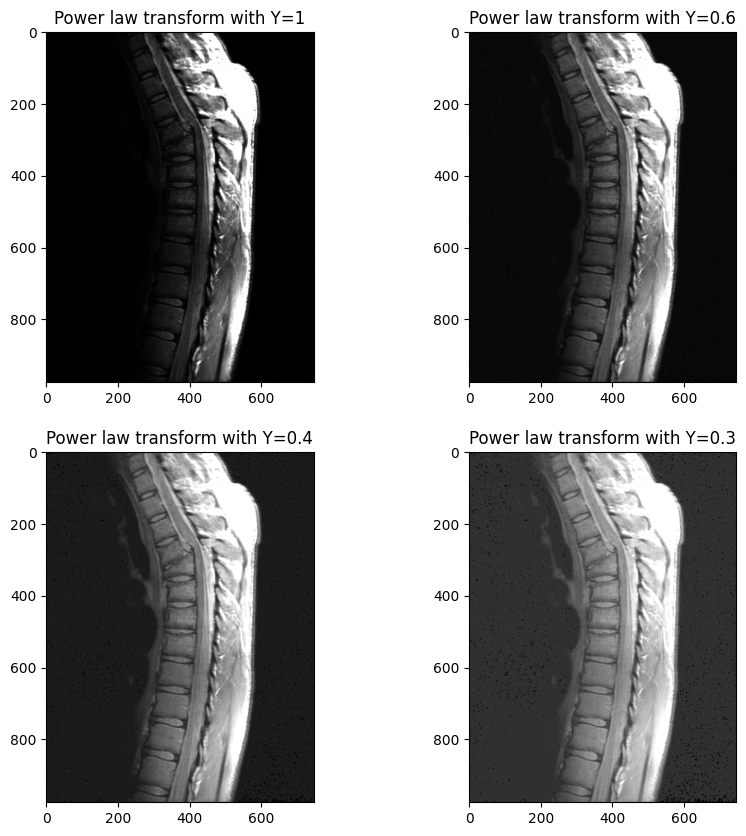

In [9]:
gammas = [1, 0.6, 0.4, 0.3]
plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    transformed_image = power_law_transform(image1, gammas[i])
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f"Power law transform with Y={gammas[i]}")
plt.show()

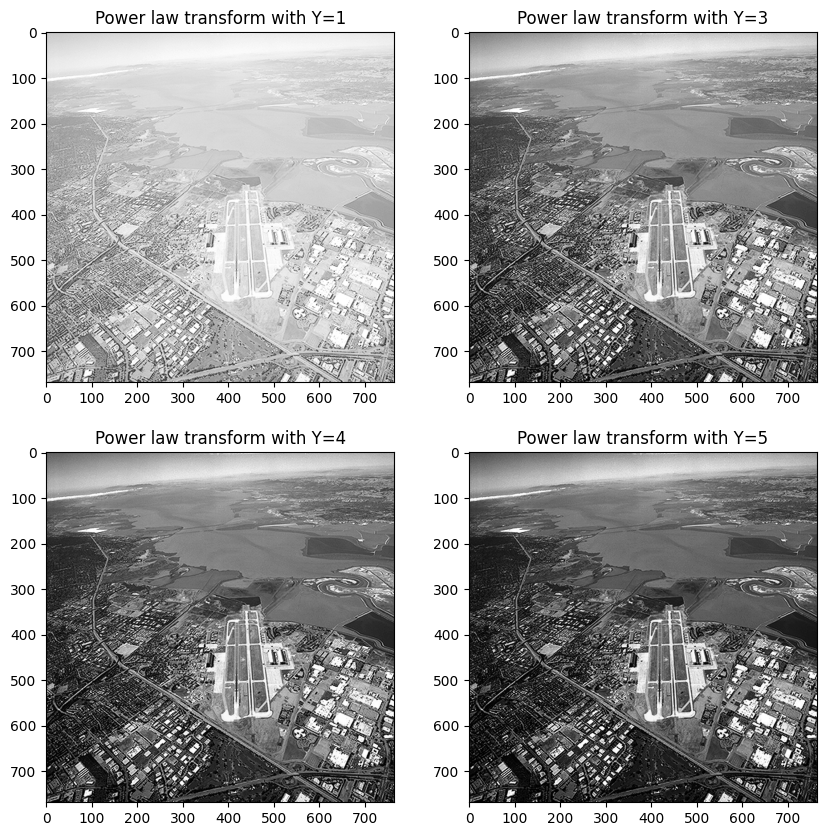

In [10]:
gammas = [1, 3, 4, 5]
plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    transformed_image = power_law_transform(image2, gammas[i])
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f"Power law transform with Y={gammas[i]}")
plt.show()

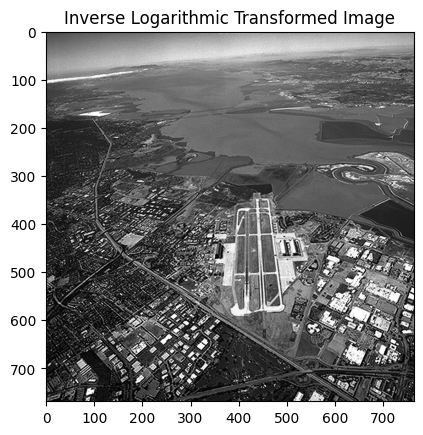

In [18]:
transformed_image = inverse_logarithmic_transform(image2)
plt.imshow(transformed_image, cmap='gray')
plt.title(f"Inverse Logarithmic Transformed Image")
plt.show()